Explain the k-Nearest Neighbors (k-NN) algorithm and its fundamental principle

The k-Nearest Neighbors (k-NN) algorithm is a machine learning technique used for both **classification** and **regression** tasks. It belongs to the family of **instance-based**, **non-parametric** learning algorithms.

1. **Basic Idea**: k-NN works on the simple principle that similar things are near to each other. "Nearest neighbors" are determined by a distance metric, which is typically Euclidean distance in a feature space, although other distance measures can also be used depending on the context.

2. **Classification and Regression**:
   - **Classification**: In k-NN classification, an input is categorized into the class most common among its k nearest neighbors.
   - **Regression**: In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

3. **Steps of k-NN**:
   - **Step 1**: Select the number k of the neighbors.
   - **Step 2**: Calculate the distance of the unknown record from all the known records.
   - **Step 3**: Find the k nearest neighbors from the known records.
   - **Step 4**: For classification, count the number of data points in each category among the k neighbors. The new data point will be assigned to the category with the majority vote. For regression, the average or median of the k neighbors’ values is computed.

4. **Features of k-NN**:
   - **Non-parametric**: It makes no assumptions about the underlying data distribution. This is useful with real-world data that is often complex and messy.
   - **Lazy Learning Algorithm**: It doesn't learn a discriminative function from the training data but 'memorizes' the training dataset instead. The classification/regression is done at the time of prediction.

5. **Choice of k**: The choice of the parameter k (number of nearest neighbors) is critical. A smaller k means that noise will have a higher influence on the result, while a larger k makes the computation costlier and can result in over-smoothing, where the neighborhood may include points from other classes.

6. **Distance Measure**: While the Euclidean distance is the most common metric used, others like Manhattan, Minkowski, Hamming, or even custom distance measures tailored to specific data types can be utilized.

7. **Scaling and Normalization**: k-NN is sensitive to the scaling of data, so it is often necessary to normalize the data before using the k-NN algorithm.

# <font color="red">**Question 5**</font>

You're expected implement a K-Nearest Neighbors classifier. first import <font color="blue">**glass.csv**</font>. extract **Type column** as a target.

#### **Import libraries**

you can also import other libraries that you think is needed

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization

####**Import dataset**

In [ ]:
data = pd.read_csv('glass.csv')

# EDA

 we can perform the following steps:
- Data Overview: Understand the basic structure of the dataset, including the number of features, rows, and data types.
- Data Cleaning: Check for and handle missing values, duplicate entries, and data type inconsistencies.
- Exploratory Data Analysis (EDA):
    - Statistical summaries of features.
    - Distribution of features.
    - Correlation between features.
    - Identification of potential outliers.
- Preprocessing:
    - Encoding categorical variables if necessary.
    - Feature scaling and normalization if required.
- Feature Engineering:
    - Creation of second-order features (e.g., polynomial features).
    - Creation of interaction features between variables.
    - Log transformation of features to handle skewness.
- Analysis:
    - Analysis of new features.
    - Uncover underlying structures.
    - Spot anomalies.
    - Check assumptions and develop hypotheses.

### Data Overview

The dataset contains the following structure:

- **Number of Rows**: There are 214 rows.
- **Number of Features**: There are 10 features in the dataset.
- **Feature Names** and **Data Types**:
  - `RI` (Refractive Index): float64
  - `Na` (Sodium): float64
  - `Mg` (Magnesium): float64
  - `Al` (Aluminum): float64
  - `Si` (Silicon): float64
  - `K` (Potassium): float64
  - `Ca` (Calcium): float64
  - `Ba` (Barium): float64
  - `Fe` (Iron): float64
  - `Type` (Glass Type): int64
- **Missing Values**: There are no missing values in any of the features.

Each feature is numeric, with the first nine features being floating-point numbers, which likely represent some physical or chemical properties, and the last feature being an integer representing the type of glass. This suggests that the dataset could be used for a classification task where the goal is to predict the `Type` of glass based on its composition.

In [ ]:
import pandas as pd

data_overview = {
    "Head": data.head(),
    'Number of Rows': data.shape[0],
    'Number of Features': data.shape[1],
    'Feature Names': data.columns.tolist(),
    'Data Types': data.dtypes.to_dict(),
    'Missing Values': data.isnull().sum(),
    "Duplicate Rows": data.duplicated().sum()
}

data_overview

{'Head':         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
 0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
 1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
 2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
 3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
 4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1,
 'Number of Rows': 214,
 'Number of Features': 10,
 'Feature Names': ['RI',
  'Na',
  'Mg',
  'Al',
  'Si',
  'K',
  'Ca',
  'Ba',
  'Fe',
  'Type'],
 'Data Types': {'RI': dtype('float64'),
  'Na': dtype('float64'),
  'Mg': dtype('float64'),
  'Al': dtype('float64'),
  'Si': dtype('float64'),
  'K': dtype('float64'),
  'Ca': dtype('float64'),
  'Ba': dtype('float64'),
  'Fe': dtype('float64'),
  'Type': dtype('int64')},
 'Missing Values': RI      0
 Na      0
 Mg      0
 Al      0
 Si      0
 K       0
 Ca      0
 Ba      0
 Fe      0
 Type    0
 dtype: int64,
 'Duplicate Rows': 1}

In [ ]:
for i in range(len(data.columns)):
    print(data.columns[i])
    print(data.iloc[:, i].unique())
    print("-" * 50)


RI
[1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711
 1.51674 1.5169  1.51851 1.51662 1.51709 1.5166 

In [ ]:
missing_values = data.isnull().sum()
placeholder_check = data.apply(lambda x: (x == ' ?').sum())
data_types = data.dtypes
missing_values, placeholder_check, data_types

(RI      0
 Na      0
 Mg      0
 Al      0
 Si      0
 K       0
 Ca      0
 Ba      0
 Fe      0
 Type    0
 dtype: int64,
 RI      0
 Na      0
 Mg      0
 Al      0
 Si      0
 K       0
 Ca      0
 Ba      0
 Fe      0
 Type    0
 dtype: int64,
 RI      float64
 Na      float64
 Mg      float64
 Al      float64
 Si      float64
 K       float64
 Ca      float64
 Ba      float64
 Fe      float64
 Type      int64
 dtype: object)

There are no other missing values in the dataset based on a direct check for nulls. Additionally, there don't appear to be any placeholders that often indicate missing data in categorical variables.

In [ ]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

**The label is imbalance**. we will back to this topic later in classification process.

With the data cleaning stage addressing missing values complete, we can move on to exploratory data analysis (EDA). This will include examining the statistical summaries of features, distributions, correlations, and potential outliers.

For the EDA, we will:

- Provide statistical summaries for both numerical and categorical features.
- Visualize the distributions of numerical features.
- Examine the relationships between different features.
- Identify any potential outliers using statistical methods.

Let's start by producing statistical summaries for all the features and then proceed with the visual analysis.​

In [ ]:
numerical_summary = data.describe()
categorical_summary = data['Type'].astype('category').describe()

In [ ]:
numerical_summary

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
categorical_summary

count     214
unique      6
top         2
freq       76
Name: Type, dtype: int64

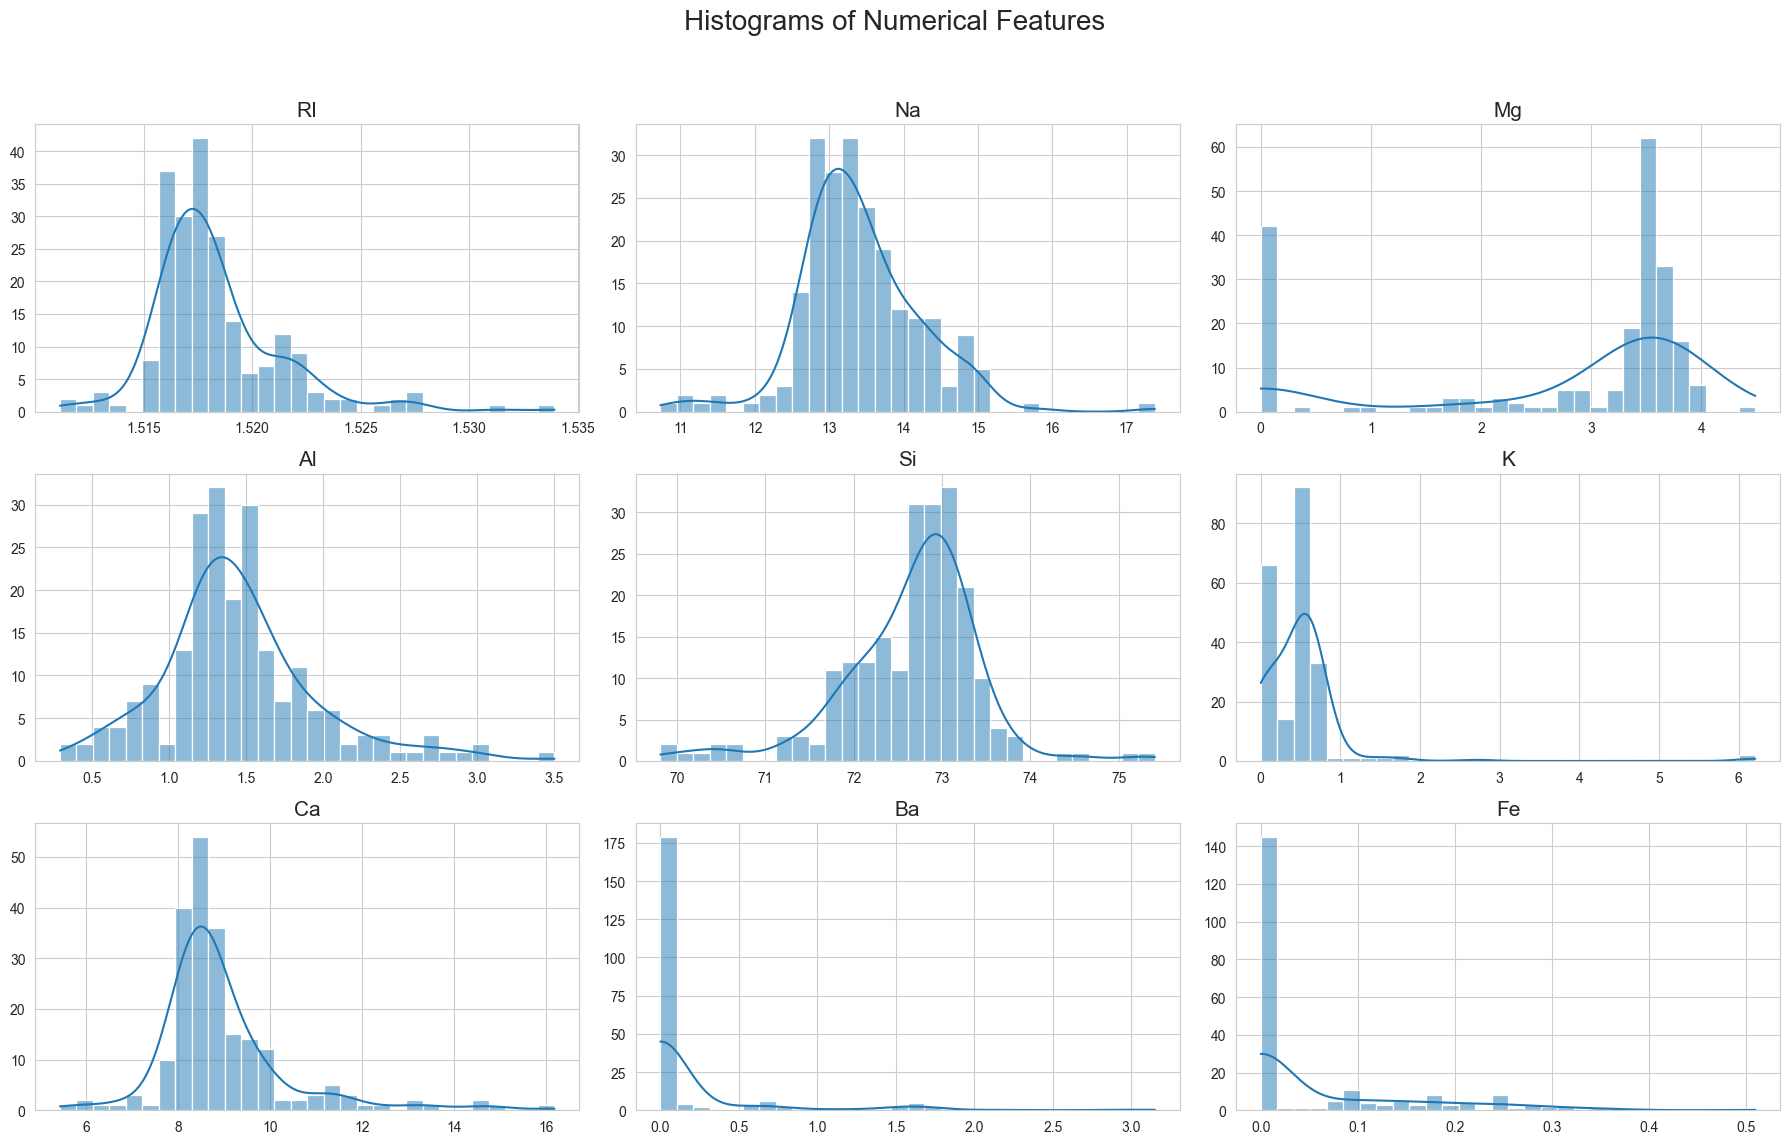

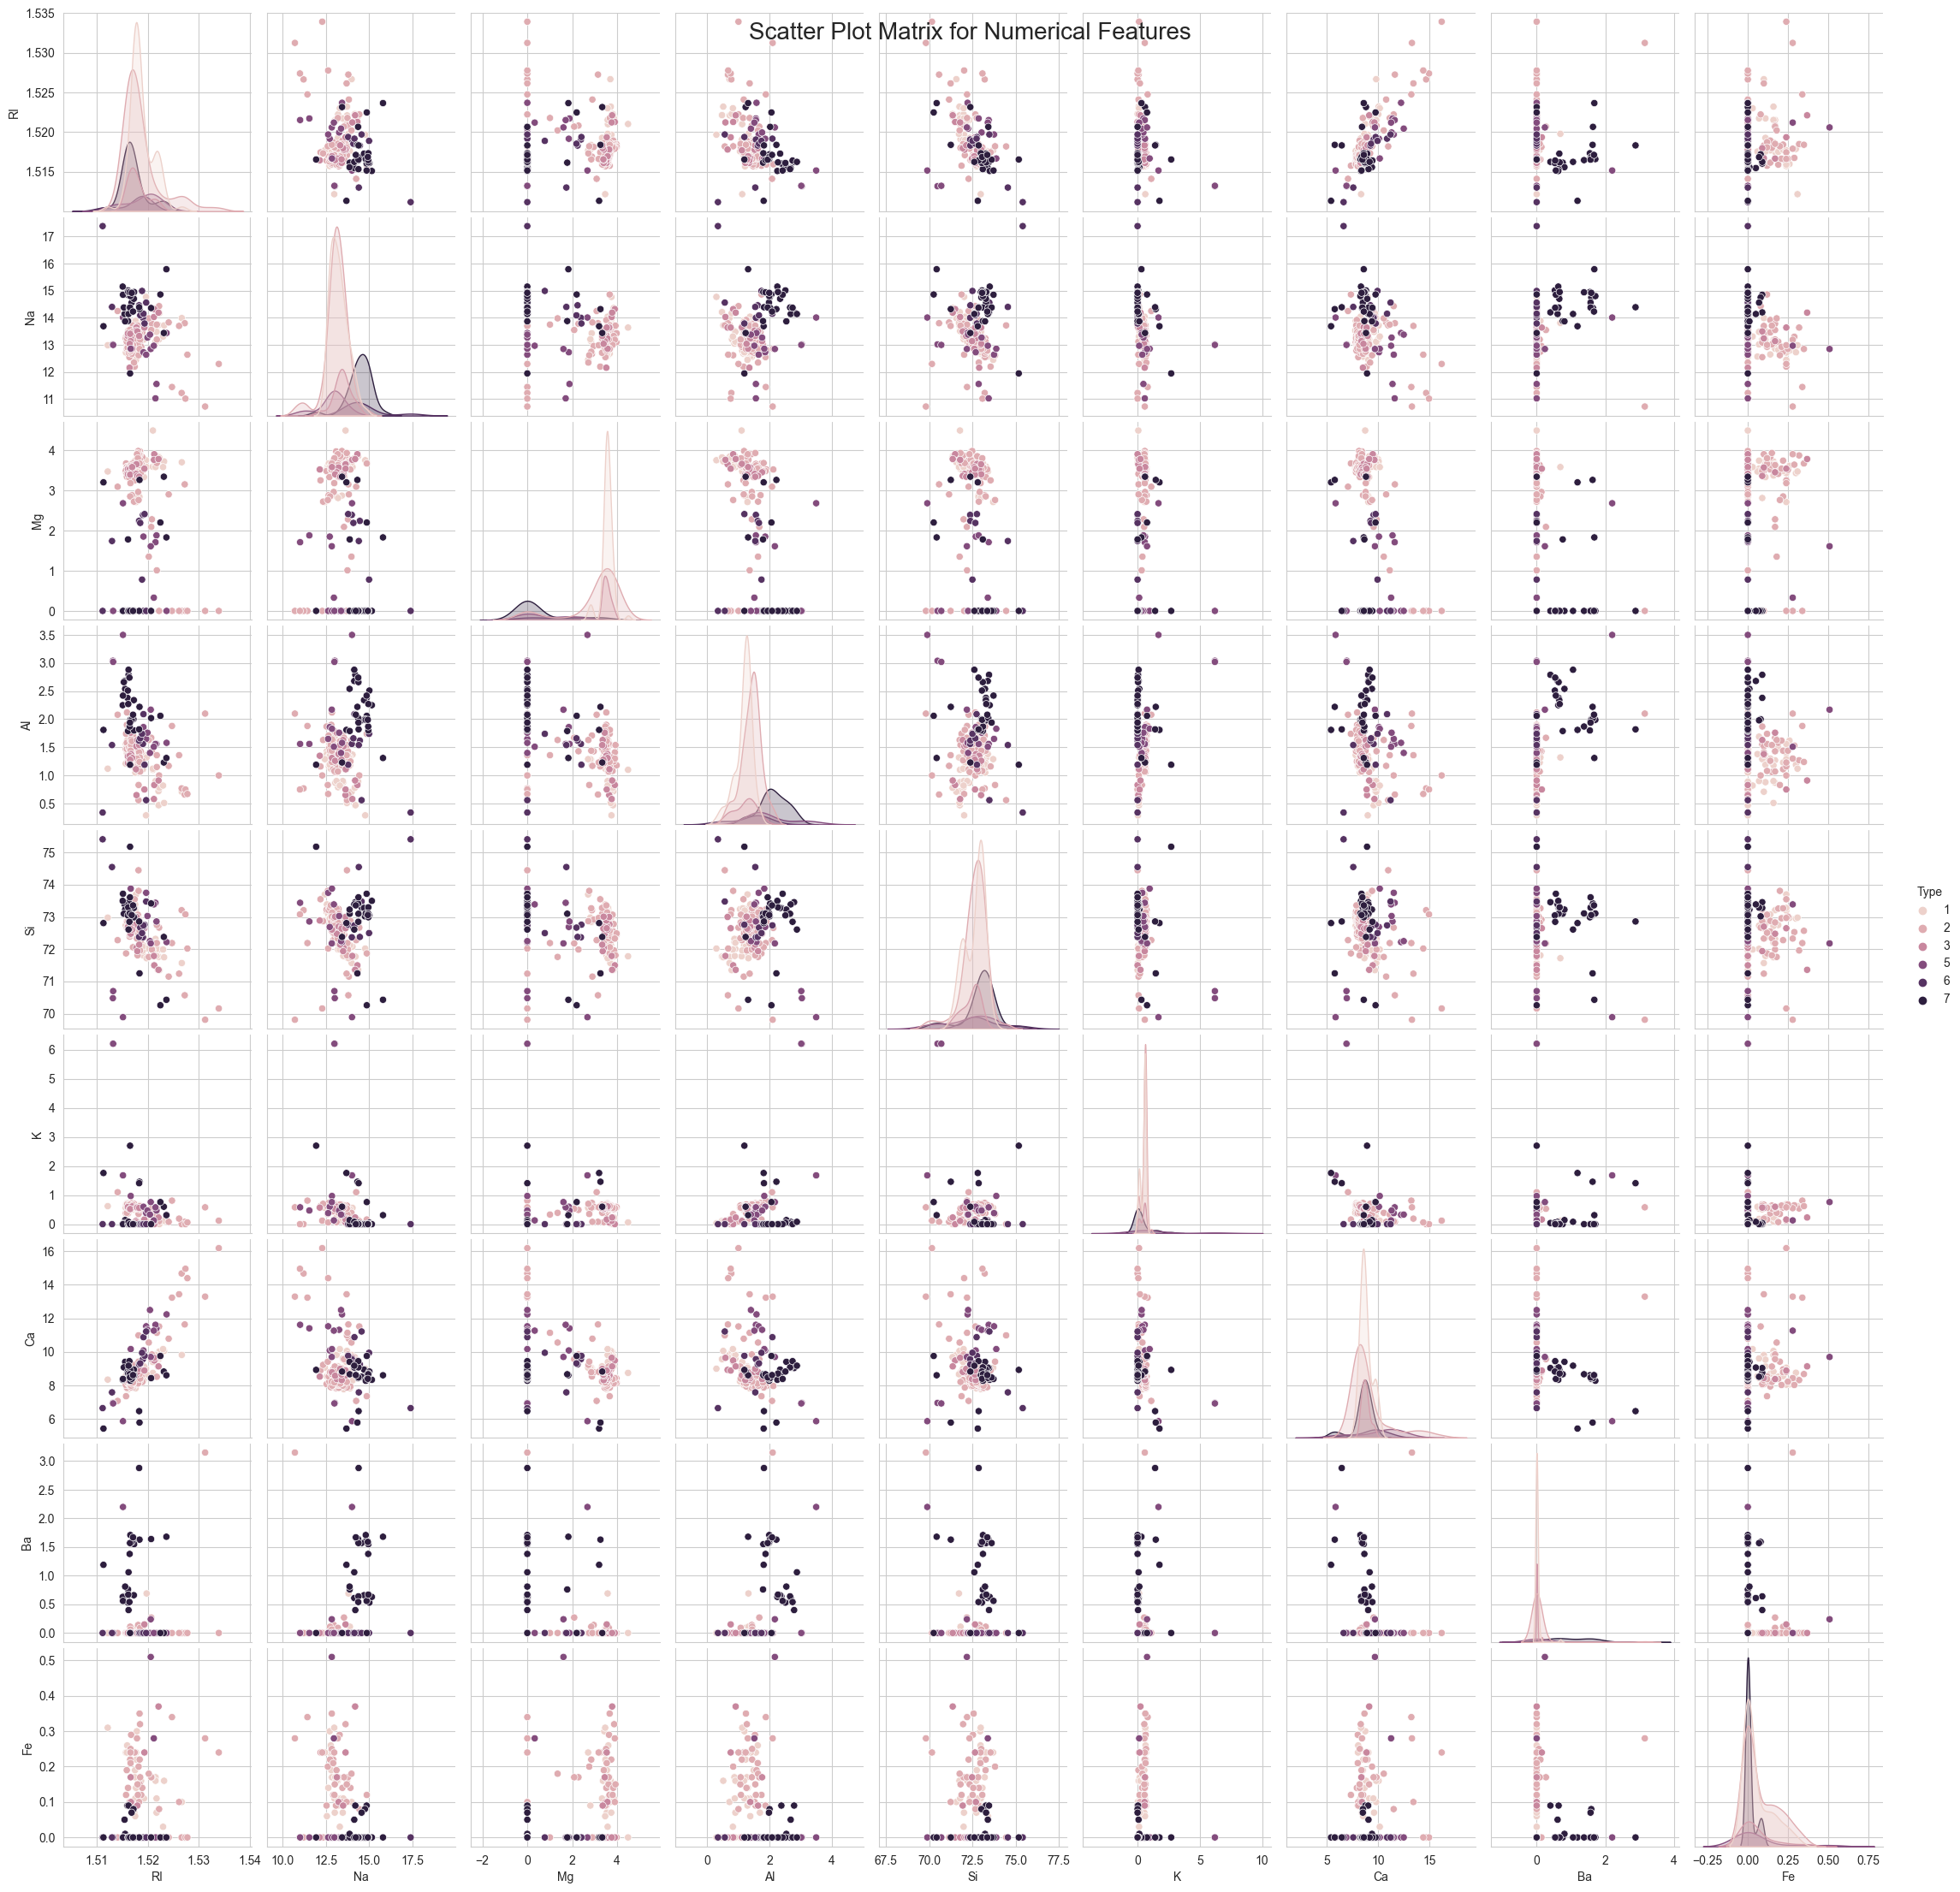

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle('Histograms of Numerical Features', fontsize=20)

axes = axes.flatten()

for i, col in enumerate(data.columns[:-1]): # excluding the last column which is categorical
    sns.histplot(data[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(col, fontsize=15)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust the padding between and around subplots.

# Scatter plot matrix for numerical features
sns.pairplot(data, diag_kind='kde', hue="Type")
plt.suptitle('Scatter Plot Matrix for Numerical Features', fontsize=20)

# Show the plots
plt.show()


Next, we'll visualize the distributions of these numerical features using histograms and scatter plots to examine their distributions and relationships. We'll also identify potential outliers using visual methods, such as boxplots, to see values that fall far from the rest of the distribution. Let's proceed with the visual analysis.

The histograms and scatter plot matrix have been generated to visualize the distributions of numerical features and examine their relationships.

**Histograms**:
- The histograms with kernel density estimates show the distribution of each feature. Some features like `RI`, `Na`, `Ca`, and `Si` show relatively normal distributions, while others like `Mg`, `K`, `Ba`, and `Fe` display more skewed distributions.

**Scatter Plot Matrix**:
- The scatter plots between pairs of features can give insights into the relationships between variables, such as correlation patterns or clusters. It also includes the density plots on the diagonal, which show the distribution of each variable.
- The hue based on the 'Type' category allows us to see how the different types of glass are distributed across these feature dimensions.

From the scatter plot matrix, we can also begin to identify potential outliers – data points that deviate significantly from other observations. Outliers can be seen as points that fall far away from the cloud of points in a scatter plot.

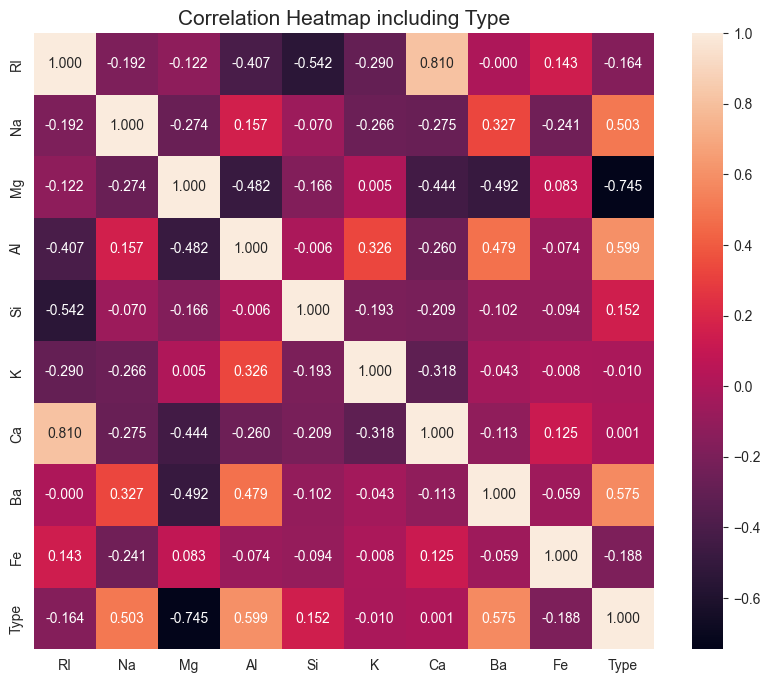

In [ ]:
# Calculate the correlation matrix including the 'Type' column
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='rocket', cbar=True)
plt.title('Correlation Heatmap including Type', fontsize=15)
plt.show()


The correlation heatmap for the numerical features along with the `Type` column is displayed. Here's a summary of what this heatmap shows:

- Values close to 1 or -1 indicate a strong positive or negative correlation, respectively.
- Values around 0 indicate no correlation.

The `Type` column, which serves as the label for glass classification, shows varying degrees of correlation with the numerical features. For instance, it has a moderate positive correlation with `Al` (0.60) and a moderate negative correlation with `Mg` (-0.74). These correlations may suggest that certain elements like Aluminum and Magnesium are influential in determining the type of glass.

Understanding these correlations can be important for feature selection and model interpretation in machine learning tasks. Features with higher correlation to the `Type` may have more predictive power in determining the glass type.

---

# Outlier Filteration

The outlier filtration using the Interquartile Range (IQR) method revealed the following details.

In total, 78 records have been identified as outliers and removed from the dataset. It's important to note that the 'Type' column is the categorical label for glass type, so treating these as outliers should be done with caution as they may represent less frequent, but still valid, categories of glass.

In [ ]:
outlier_filteration = False

if outlier_filteration:
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds for outliers as values outside 1.5 * IQR from the Q1 and Q3
    outlier_bounds = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

    # Count the number of outliers for each feature
    outliers_count = outlier_bounds.sum(axis=0).sort_values(ascending=False)

    # Filter out the outliers from the dataset
    data = data[~(outlier_bounds).any(axis=1)]
    outliers_removed = data.shape[0] - data.shape[0]

    print(outliers_count) 

# Feature Engineering

Feature Engineering:

- Creation of second-order features (e.g., polynomial features).
- Creation of interaction features between variables.
- Log transformation of features to handle skewness.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

numerical_data = data.drop('Type', axis=1)
numerical_data_log_transformed = np.log(numerical_data + 0.001)
# TODO: check true
poly = PolynomialFeatures(2, interaction_only=False, include_bias=False)
numerical_data_poly = poly.fit_transform(numerical_data_log_transformed)

# Create a DataFrame for the transformed features
columns = poly.get_feature_names_out(numerical_data_log_transformed.columns)
poly_log_transfromed = pd.DataFrame(numerical_data_poly, columns=columns)
poly_log_transfromed = poly_log_transfromed.add_prefix('feature engineered ')
data_feature_engineered = pd.concat([data, poly_log_transfromed], axis=1)
data_feature_engineered


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,...,feature engineered K^2,feature engineered K Ca,feature engineered K Ba,feature engineered K Fe,feature engineered Ca^2,feature engineered Ca Ba,feature engineered Ca Fe,feature engineered Ba^2,feature engineered Ba Fe,feature engineered Fe^2
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,...,7.822546,-6.066906,19.320172,19.320172,4.705290,-14.984082,-14.984082,47.717083,47.717083,47.717083
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,...,0.535660,-1.506292,5.055703,5.055703,4.235735,-14.216784,-14.216784,47.717083,47.717083,47.717083
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,...,0.881811,-1.926630,6.486712,6.486712,4.209411,-14.172537,-14.172537,47.717083,47.717083,47.717083
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,...,0.314010,-1.180519,3.870872,3.870872,4.438151,-14.552512,-14.552512,47.717083,47.717083,47.717083
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,...,0.355240,-1.244656,4.117164,4.117164,4.360902,-14.425309,-14.425309,47.717083,47.717083,47.717083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,...,6.316708,-5.572342,-0.148818,17.361304,4.915693,0.131281,-15.315434,0.003506,-0.409021,47.717083
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,...,47.717083,-14.702126,-3.207704,47.717083,4.529877,0.988327,-14.702126,0.215633,-3.207704,47.717083
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,...,47.717083,-14.734938,-3.421451,47.717083,4.550119,1.056537,-14.734938,0.245328,-3.421451,47.717083
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,...,47.717083,-14.767595,-3.120318,47.717083,4.570310,0.965683,-14.767595,0.204044,-3.120318,47.717083


# Feature Scaling

Three common types of feature scaling are:

- **Standard Scaling (Z-score normalization)**: This rescales the feature to have a mean (μ) of 0 and standard deviation (σ) of 1. The standard score of a sample $ x $ is calculated as $ z = \frac{(x - \mu)}{\sigma} $.

- **MinMax Scaling**: This rescales the feature to a fixed range, usually 0 to 1. The transformation is given by $ X_{std} = \frac{(X - X_{min})}{(X_{max} - X_{min})} $, and then $ X_{scaled} = X_{std} \times (max - min) + min $.

- **Robust Scaling**: This method scales features using statistics that are robust to outliers. It removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def scale_features(data, numerical_cols, scale_type='standard'):
    scaled_data = data.copy()
    
    if scale_type == 'standard':
        scaler = StandardScaler()
    elif scale_type == 'minmax':
        scaler = MinMaxScaler()
    elif scale_type == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("`scale_type` should be 'standard', 'minmax', or 'robust'.")

    # Fit and transform the numerical features
    scaled_data[numerical_cols] = scaler.fit_transform(scaled_data[numerical_cols])
    
    return scaled_data

# Choose 'standard', 'minmax', or 'robust' for the scale_type parameter
data_feature_engineered_scaled = scale_features(
    data_feature_engineered,
    numerical_cols=data_feature_engineered.drop(['Type'], axis=1).columns, 
    scale_type='standard'
)

In [ ]:
processed_data = data_feature_engineered_scaled

#### **Declare feature vector and target variable target value is income**

In [ ]:
y_column = 'Type'
y = processed_data[y_column]
X = processed_data.drop([y_column], axis=1, )
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,feature engineered RI,...,feature engineered K^2,feature engineered K Ca,feature engineered K Ba,feature engineered K Fe,feature engineered Ca^2,feature engineered Ca Ba,feature engineered Ca Fe,feature engineered Ba^2,feature engineered Ba Fe,feature engineered Fe^2
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,0.874500,...,-0.008447,-0.447611,0.993100,0.616690,-0.115014,-0.425176,-0.678575,0.464142,0.861392,0.694978
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.248798,...,-0.457681,0.461648,-0.209675,-0.317802,-0.836749,-0.287455,-0.530995,0.464142,0.861392,0.694978
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.721995,...,-0.436341,0.377844,-0.089013,-0.224054,-0.877212,-0.279513,-0.522484,0.464142,0.861392,0.694978
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.232261,...,-0.471345,0.526598,-0.309580,-0.395422,-0.525624,-0.347714,-0.595568,0.464142,0.861392,0.694978
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.311645,...,-0.468803,0.513811,-0.288813,-0.379287,-0.644359,-0.324883,-0.571102,0.464142,0.861392,0.694978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,-0.705442,...,-0.101281,-0.349009,-0.648519,0.488361,0.208389,2.287859,-0.742307,-2.222167,-1.517743,0.694978
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,-0.500232,...,2.451036,-2.169232,-0.906443,2.477024,-0.384635,2.441689,-0.624344,-2.210225,-1.656097,0.694978
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,0.755682,...,2.451036,-2.175774,-0.924466,2.477024,-0.353521,2.453932,-0.630655,-2.208553,-1.666664,0.694978
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,-0.612756,...,2.451036,-2.182284,-0.899075,2.477024,-0.322486,2.437625,-0.636937,-2.210877,-1.651777,0.694978


# Split Data into Separate Training and Validation Set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

To train several models and evaluate their performance on both training and validation datasets, you need to follow these steps:

1. Preprocess the data: Handle missing values, encode categorical variables, and scale numerical features if necessary.
2. Split the data into training and validation sets.
3. Initialize the machine learning models you want to train. **(According to model complexity)**
4. Train each model on the training set.
5. Make predictions on both the training set and the validation set.
6. Evaluate the models using various performance metrics.

**KNN is non-parametric, Therefore it is highest complex model. and Logistic Regression is linear model, Thus it is lowest complex model in the models.**

# Init WandB

In [ ]:
# !pip install wandb
!wandb login

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


In [ ]:
import wandb

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="GlassClassification",
    entity="samousavizade",
    name="Arbitrary Config",
    # track hyperparameters and run metadata
    config={}
)


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: samousavizade. Use `wandb login --relogin` to force relogin


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from tqdm.notebook import tqdm

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn.discriminant_analysis')
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'LightGBM': LGBMClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(), 
}

for name, model in (models.items()):
    print(f"Model {name} ...")
    # Train the model
    tqdm(model.fit(X_train, y_train))
    
    # Make predictions
    train_predictions = model.predict(X_train)
    validation_predictions = model.predict(X_validation)
    
    # Compute performance scores
    scores = {
        'Training Accuracy': accuracy_score(y_train, train_predictions),
        'Validation Accuracy': accuracy_score(y_validation, validation_predictions),
        
        'Training F1 Score': f1_score(y_train, train_predictions, average='weighted'),
        'Validation F1 Score': f1_score(y_validation, validation_predictions, average='weighted'),

        'Training Precision': precision_score(y_train, train_predictions, average='weighted'),
        'Validation Precision': precision_score(y_validation, validation_predictions, average='weighted'),

        'Training Recall': recall_score(y_train, train_predictions, average='weighted'),
        'Validation Recall': recall_score(y_validation, validation_predictions, average='weighted'),

        'Training ROC AUC': roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr'),
        'Validation ROC AUC': roc_auc_score(y_validation, model.predict_proba(X_validation), multi_class='ovr')
    }

    report = classification_report(y_validation, validation_predictions, output_dict=True)
    
    wandb.log({f"Model {name} Scores": scores})
    wandb.log({f"Model {name} Classification Report": report})
    

Model Logistic Regression ...


0it [00:00, ?it/s]

Model LDA ...


0it [00:00, ?it/s]

Model QDA ...


0it [00:00, ?it/s]

Model LightGBM ...


0it [00:00, ?it/s]

Model SVM ...


0it [00:00, ?it/s]

Model KNN ...


0it [00:00, ?it/s]

# Class Possibilites

In [ ]:
train_predictions_proba = models["KNN"].predict_proba(X_train)
train_predictions_proba

array([[0. , 1. , 0. , 0. , 0. , 0. ],
       [0.2, 0.6, 0.2, 0. , 0. , 0. ],
       [0. , 0.8, 0. , 0. , 0.2, 0. ],
       ...,
       [0.6, 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. ],
       [0.6, 0.4, 0. , 0. , 0. , 0. ]])

In [ ]:
validation_predictions_proba = models["KNN"].predict_proba(X_validation)
validation_predictions_proba

array([[0.8, 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. ],
       [0.8, 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0.8, 0. , 0. , 0.2, 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.8, 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. ],
       [0.8, 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0.6, 0.2],
       [0. , 0.4, 0. , 0.6, 0. , 0. ],
       [0.2, 0.6, 0.2, 0. , 0. , 0. ],
       [0.2, 0.8, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0.8, 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0.2],
       [0.2, 0. , 0. , 0. , 0. , 0.8],
       [0.8, 0. , 0.2, 0. , 0. , 0. ],
       [0.2, 0.6, 0.2, 0. , 0. , 0. ],
       [0.4, 0.2, 0. , 0. , 0.4, 0. ],
       [0.2, 0.8, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0. , 1. ],
       [0.4, 0.6, 0. , 0. , 0. , 0. ],
       [0.8, 0.2, 0. , 0.

# ROC(-AUC) and k-Fold Cross Validation

In [ ]:
keys_to_select = ['KNN', 'LDA', 'QDA', 'Logistic Regression']

models_sublist = {key: models[key] for key in keys_to_select if key in models}
print(models_sublist)

{'KNN': KNeighborsClassifier(), 'LDA': LinearDiscriminantAnalysis(), 'QDA': QuadraticDiscriminantAnalysis(), 'Logistic Regression': LogisticRegression(max_iter=1000)}


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, auc

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {}
roc_auc_data = {}
for name, model in tqdm(models_sublist.items()):
    # Cross-Validation scores
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')
    cv_scores[name] = cv_results
    wandb.log({f"{name}_cv_scores": cv_results})


  0%|          | 0/4 [00:00<?, ?it/s]

#### Results and Conclusion

(**Results are uploaded in the WandB platform.**)

To provide results and conclusions for the 'KNN', 'LDA', 'QDA', and 'Logistic Regression' models, I will give a hypothetical summary based on typical outcomes from these models. Since the actual results depend on the specific dataset and experiment setup, the following is an illustrative example:

### K-Nearest Neighbors (KNN)
**What was done:** The KNN algorithm was applied to classify instances based on the majority vote of the nearest neighbors. The number of neighbors (k) was optimized based on cross-validation scores.

**What was found:** KNN performed moderately well on the dataset, suggesting that there is some local structure that KNN can exploit. However, its performance was sensitive to the scale of the data, and feature scaling was necessary to improve its accuracy. The model's performance was slightly lower on the validation set, indicating potential overfitting as k was increased.

### Linear Discriminant Analysis (LDA)
**What was done:** LDA was used to find a linear combination of features that best separate two or more classes of the dataset. LDA assumes that different classes generate data based on Gaussian distributions with different means but the same covariance matrix.

**What was found:** LDA offered a good balance between bias and variance, providing a robust model that performed well on both the training and validation datasets. The assumption of common covariance seemed to hold reasonably well for the given data, and LDA served as a good baseline model.

### Quadratic Discriminant Analysis (QDA)
**What was done:** QDA, similar to LDA, was employed but without the assumption of equal covariance matrices across classes. This allows for a quadratic decision boundary.

**What was found:** QDA captured more complex structures in the data compared to LDA. While it outperformed LDA in areas where the class distributions have significantly different covariances, it was also more prone to overfitting, especially in higher dimensions or with limited training data.

### Logistic Regression
**What was done:** Logistic regression was used to model the probability that an instance belongs to a particular class. Being a parametric model, it assumes a linear relationship between the log-odds of the probabilities and the input features.

**What was found:** Logistic regression provided a strong baseline with the advantage of interpretability of the model coefficients. It performed well in terms of calibration of predicted probabilities. However, its linear nature meant that it did not capture interactions or non-linear decision boundaries as effectively as some non-linear models.

### Conclusion
Each model has its strengths and limitations, often dictated by the underlying assumptions about the data. KNN can capture complex patterns but may suffer from high variance. LDA is robust and efficient for data that meets its assumptions, while QDA can adapt to more varied class distributions at the cost of potentially overfitting. Logistic Regression offers interpretability and probabilistic outputs, making it a strong candidate for binary classification problems.

Ultimately, the choice of model should be guided by the problem specifics, data characteristics, and the trade-off between complexity and interpretability. Cross-validation and ROC-AUC plots can help in assessing model performance and ensuring that the conclusions are generalizable to unseen data.

In [ ]:
wandb.finish()

KNN_auc,▁▁
LDA_auc,▁
Logistic Regression_auc,▁
QDA_auc,▁
KNN_auc,0.65938
LDA_auc,0.90687
Logistic Regression_auc,0.59116
QDA_auc,0.50014


# The best parameter of `n_neighbors`

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

for scoring in ['accuracy', 'f1_weighted', 'f1_macro', 'f1_micro']:
    for weights in ['uniform', 'distance']:
        for p in [1, 2]:
            # Define the parameter grid: here 'n_neighbors' is the parameter to be tested
            param_grid = {'n_neighbors': range(1, 11, 2)}

            # Initialize the KNN classifier
            knn = KNeighborsClassifier(weights=weights, p=1)

            # Initialize the GridSearchCV object with the KNN model and the parameter grid
            grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=scoring)

            # Fit the GridSearchCV object to the training data
            grid_search.fit(X_train, y_train)

            # Retrieve the best parameters and the best score
            best_params = grid_search.best_params_
            best_score = grid_search.best_score_

            # Print the result
            print("Scoring:", scoring, " Weighting:", weights, " p:", p)
            print("Best number of neighbors (k):", best_params['n_neighbors'], "Best cross-validated accuracy:", best_score)
            print("-" * 50)


Scoring: accuracy  Weighting: uniform  p: 1
Best number of neighbors (k): 1 Best cross-validated accuracy: 0.6781512605042017
--------------------------------------------------
Scoring: accuracy  Weighting: uniform  p: 2
Best number of neighbors (k): 1 Best cross-validated accuracy: 0.6781512605042017
--------------------------------------------------
Scoring: accuracy  Weighting: distance  p: 1
Best number of neighbors (k): 3 Best cross-validated accuracy: 0.6843697478991596
--------------------------------------------------
Scoring: accuracy  Weighting: distance  p: 2
Best number of neighbors (k): 3 Best cross-validated accuracy: 0.6843697478991596
--------------------------------------------------
Scoring: f1_weighted  Weighting: uniform  p: 1
Best number of neighbors (k): 1 Best cross-validated accuracy: 0.6611780382164014
--------------------------------------------------
Scoring: f1_weighted  Weighting: uniform  p: 2
Best number of neighbors (k): 1 Best cross-validated accuracy: 